# Predicting Frost Days and Precipitation Percentile for the Next Month of Each City

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [87]:
# Reading the dataframes
adelphi_df = pd.read_csv('adelphi_df').set_index('Date')
ack_df = pd.read_csv('ack_df').set_index('Date')
albany_df = pd.read_csv('albany_df').set_index('Date')
alachua_df = pd.read_csv('alachua_df').set_index('Date')

# Setting index as Date and making it into a datetime object
adelphi_df.index = pd.to_datetime(adelphi_df.index)
ack_df.index = pd.to_datetime(ack_df.index)
albany_df.index = pd.to_datetime(albany_df.index)
alachua_df.index = pd.to_datetime(alachua_df.index)

## Creating function for making predictions

In [47]:
## Setting the model 
reg = Ridge(alpha=.1)
## Identifying our predictors
predictors = ['AVG_Dry_Spell', 'AVG_Frost_Days', 'AVG_Max_High_Temp','AVG_Min_Low_Temp', 'AVG_Precip_Percentile']
## Creating a function for training and prediction
def predict(predictors, df, reg):
    train = df.loc[:'2019-10-01']
    test = df.loc['2019-11-01':]
    reg.fit(train[predictors],  train['Target']) 
    predictions = reg.predict(test[predictors])
    error = print('Error: ', mean_absolute_error(test['Target'], predictions))
    r_square = print('r^2: ', r2_score(test['Target'], predictions))
    combined = pd.concat([test['Target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Prediction']
    return error, r_square, combined

## Frost Days Prediction in Adelphi

In [48]:
adelphi_df['Target'] = adelphi_df.shift(-1)['AVG_Frost_Days']
adelphi_df = adelphi_df.iloc[:-3,:].copy()
adelphi_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.666667,23.333333,58.380462,6.651906,0.008978,16.000000
2006-02-01,0.523810,16.000000,64.210977,12.375184,0.011565,12.809524
2006-03-01,0.619048,12.809524,71.779725,18.881910,0.010393,2.619048
2006-04-01,0.428571,2.619048,81.003826,29.565725,0.019990,0.095238
2006-05-01,0.380952,0.095238,88.391318,39.327334,0.044866,0.000000
...,...,...,...,...,...,...
2022-11-01,0.380952,5.809524,72.442504,25.883503,0.016771,16.952381
2022-12-01,0.476190,16.952381,66.392951,17.665203,0.020295,21.761905
2023-01-01,0.714286,21.761905,62.688411,8.430347,0.011336,17.571429


In [49]:
error, r_square, adelphi_combined = predict(predictors, adelphi_df, reg)

Error:  3.7394529440747135
r^2:  0.6921859126830302


Intercepts:  [-0.28677145 -0.0726385  -1.70164282  0.96227254  0.26132003]
               Actual  Prediction
Date                             
2019-11-01  17.571429   11.153594
2019-12-01  20.761905   14.816450
2020-01-01  16.333333   13.691023
2020-02-01  11.428571   16.297128
2020-03-01   1.380952   12.743135


<AxesSubplot:xlabel='Date'>

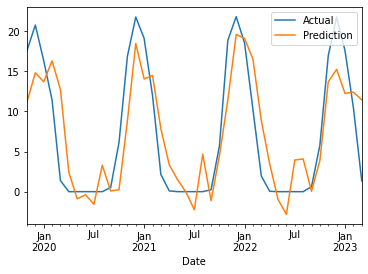

In [11]:
print('Intercepts: ', reg.coef_)
print(adelphi_combined.head())
adelphi_combined.plot()

## Precipitation  Percentile Prediction in Adelphi

In [59]:
adelphi_df['Target'] = adelphi_df.shift(-1)['AVG_Precip_Percentile']
adelphi_df = adelphi_df.iloc[:-3,:].copy()
adelphi_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.666667,23.333333,58.380462,6.651906,0.008978,0.011565
2006-02-01,0.523810,16.000000,64.210977,12.375184,0.011565,0.010393
2006-03-01,0.619048,12.809524,71.779725,18.881910,0.010393,0.019990
2006-04-01,0.428571,2.619048,81.003826,29.565725,0.019990,0.044866
2006-05-01,0.380952,0.095238,88.391318,39.327334,0.044866,0.040358
...,...,...,...,...,...,...
2022-11-01,0.380952,5.809524,72.442504,25.883503,0.016771,0.020295
2022-12-01,0.476190,16.952381,66.392951,17.665203,0.020295,0.011336
2023-01-01,0.714286,21.761905,62.688411,8.430347,0.011336,0.009181


In [60]:
error, r_square, adelphi_combined = predict(predictors, adelphi_df, reg)

Error:  0.007400526980399039
r^2:  0.5858397635181571


Intercepts:  [-2.27633919e-02  6.19570670e-05  2.49714912e-03 -1.68157310e-03
  1.65411945e-02]
              Actual  Prediction
Date                            
2019-11-01  0.017370    0.015854
2019-12-01  0.006806    0.018035
2020-01-01  0.009761    0.016053
2020-02-01  0.014421    0.003015
2020-03-01  0.023337    0.017930


<AxesSubplot:xlabel='Date'>

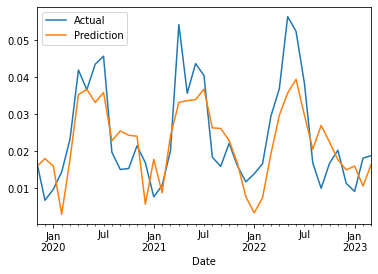

In [29]:
print('Intercepts: ', reg.coef_)
print(adelphi_combined.head())
adelphi_combined.plot()

## Frost Days Prediction in Akerman

In [63]:
ack_df['Target'] = ack_df.shift(-1)['AVG_Frost_Days']
ack_df = ack_df.iloc[:-3,:].copy()
ack_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.761905,15.761905,68.284760,16.643736,0.020218,8.619048
2006-02-01,0.285714,8.619048,71.710266,18.613628,0.035508,4.238095
2006-03-01,0.571429,4.238095,77.423640,25.492232,0.025910,0.190476
2006-04-01,0.714286,0.190476,83.610128,36.425706,0.050267,0.000000
2006-05-01,0.619048,0.000000,89.570718,48.237222,0.068791,0.000000
...,...,...,...,...,...,...
2022-11-01,0.761905,3.142857,79.125849,25.516478,0.020426,9.380952
2022-12-01,0.714286,9.380952,72.749863,20.284564,0.017431,13.904762
2023-01-01,0.619048,13.904762,70.633234,17.770612,0.024915,9.571429


In [64]:
error, r_square, akerman_combined = predict(predictors, ack_df, reg)

Error:  2.463164714478297
r^2:  0.6107966785429433


Intercepts:  [ 4.37569003  0.59830914  0.1241224  -0.12707567 -4.17042667]
               Actual  Prediction
Date                             
2019-11-01  11.761905    3.647129
2019-12-01  15.095238    9.827974
2020-01-01   8.333333   10.223383
2020-02-01   3.095238    7.688861
2020-03-01   0.285714    3.074129


<AxesSubplot:xlabel='Date'>

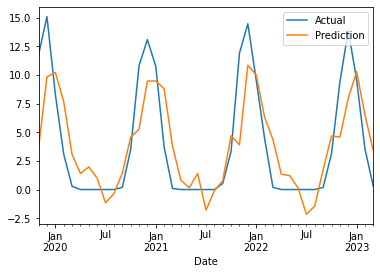

In [65]:
print('Intercepts: ', reg.coef_)
print(akerman_combined.head())
akerman_combined.plot()

## Precipitation  Percentile in Akerman

In [68]:
ack_df['Target'] = ack_df.shift(-1)['AVG_Precip_Percentile']
ack_df = ack_df.iloc[:-3,:].copy()
ack_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.761905,15.761905,68.284760,16.643736,0.020218,0.035508
2006-02-01,0.285714,8.619048,71.710266,18.613628,0.035508,0.025910
2006-03-01,0.571429,4.238095,77.423640,25.492232,0.025910,0.050267
2006-04-01,0.714286,0.190476,83.610128,36.425706,0.050267,0.068791
2006-05-01,0.619048,0.000000,89.570718,48.237222,0.068791,0.036965
...,...,...,...,...,...,...
2022-11-01,0.761905,3.142857,79.125849,25.516478,0.020426,0.017431
2022-12-01,0.714286,9.380952,72.749863,20.284564,0.017431,0.024915
2023-01-01,0.619048,13.904762,70.633234,17.770612,0.024915,0.024384


In [69]:
error, r_square, akerman_combined = predict(predictors, ack_df, reg)

Error:  0.011301574628479845
r^2:  0.0056865946201482


Intercepts:  [-0.00972896 -0.00114378 -0.00176282  0.00083755  0.03766707]
              Actual  Prediction
Date                            
2019-11-01  0.008758    0.033150
2019-12-01  0.023799    0.026084
2020-01-01  0.015791    0.029949
2020-02-01  0.037540    0.029844
2020-03-01  0.027960    0.035625


<AxesSubplot:xlabel='Date'>

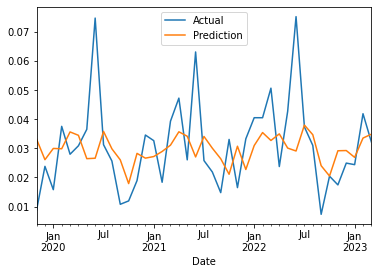

In [32]:
print('Intercepts: ', reg.coef_)
print(akerman_combined.head())
akerman_combined.plot()

## Frost Days Prediction in Albany

In [72]:
albany_df['Target'] = albany_df.shift(-1)['AVG_Frost_Days']
albany_df = albany_df.iloc[:-3,:].copy()
albany_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,1.000000,0.476190,65.503689,36.699087,0.024288,0.619048
2006-02-01,0.380952,0.619048,68.575741,37.137335,0.054996,0.000000
2006-03-01,0.761905,0.000000,72.179500,42.088860,0.016353,0.000000
2006-04-01,1.190476,0.000000,74.968146,43.077417,0.008492,0.000000
2006-05-01,1.714286,0.000000,77.666171,45.992517,0.000690,0.000000
...,...,...,...,...,...,...
2022-11-01,1.047619,0.190476,75.137506,40.119746,0.016749,0.333333
2022-12-01,0.761905,0.333333,66.630203,36.781461,0.049533,0.095238
2023-01-01,0.809524,0.095238,66.625767,38.080262,0.078666,0.095238


In [73]:
error, r_square, albany_combined = predict(predictors, albany_df, reg)

Error:  0.066839271241332
r^2:  0.33051078442405846


Intercepts:  [ 0.01802534  0.27710369 -0.00134875 -0.00560657 -0.20690187]
              Actual  Prediction
Date                            
2019-11-01  0.047619    0.086385
2019-12-01  0.095238    0.101883
2020-01-01  0.047619    0.110137
2020-02-01  0.190476    0.066595
2020-03-01  0.000000    0.115587


<AxesSubplot:xlabel='Date'>

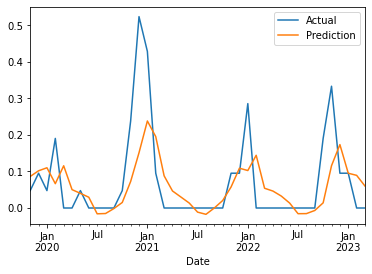

In [22]:
print('Intercepts: ', reg.coef_)
print(albany_combined.head())
albany_combined.plot()

## Precipitation  Percentile Prediction in Albany

In [79]:
albany_df['Target'] = albany_df.shift(-1)['AVG_Precip_Percentile']
albany_df = albany_df.iloc[:-3,:].copy()
albany_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,1.000000,0.476190,65.503689,36.699087,0.024288,0.054996
2006-02-01,0.380952,0.619048,68.575741,37.137335,0.054996,0.016353
2006-03-01,0.761905,0.000000,72.179500,42.088860,0.016353,0.008492
2006-04-01,1.190476,0.000000,74.968146,43.077417,0.008492,0.000690
2006-05-01,1.714286,0.000000,77.666171,45.992517,0.000690,0.000000
...,...,...,...,...,...,...
2022-11-01,1.047619,0.190476,75.137506,40.119746,0.016749,0.049533
2022-12-01,0.761905,0.333333,66.630203,36.781461,0.049533,0.078666
2023-01-01,0.809524,0.095238,66.625767,38.080262,0.078666,0.030323


In [80]:
error, r_square, albany_combined = predict(predictors, albany_df, reg)

Error:  0.010488244916233916
r^2:  0.42697381378764454


Intercepts:  [-0.00094447  0.01523375 -0.00129279 -0.00050978  0.02520089]
              Actual  Prediction
Date                            
2019-11-01  0.014858    0.017661
2019-12-01  0.021350    0.029614
2020-01-01  0.054410    0.030921
2020-02-01  0.016609    0.023579
2020-03-01  0.002640    0.020151


<AxesSubplot:xlabel='Date'>

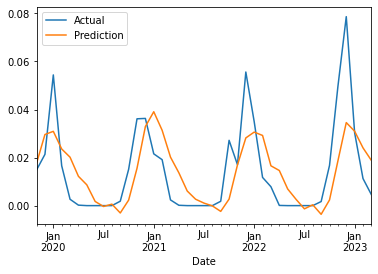

In [81]:
print('Intercepts: ', reg.coef_)
print(albany_combined.head())
albany_combined.plot()

## Frost Days Prediction in Alachua

In [74]:
alachua_df['Target'] = alachua_df.shift(-1)['AVG_Precip_Percentile']
alachua_df = alachua_df.iloc[:-3,:].copy()
alachua_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.714286,2.714286,78.249658,27.608118,0.025237,0.029095
2006-02-01,0.428571,0.952381,81.318539,32.829384,0.029095,0.008301
2006-03-01,0.952381,0.476190,84.662147,35.377309,0.008301,0.016765
2006-04-01,0.857143,0.000000,90.444171,45.618184,0.016765,0.040942
2006-05-01,0.761905,0.000000,95.701762,55.105053,0.040942,0.080165
...,...,...,...,...,...,...
2022-11-01,0.952381,0.142857,86.245411,39.871050,0.006682,0.013194
2022-12-01,1.095238,1.238095,81.418748,31.882749,0.013194,0.020701
2023-01-01,0.809524,1.285714,79.538338,29.248816,0.020701,0.014978


In [75]:
error, r_square, alachua_combined = predict(predictors, alachua_df, reg)

Error:  0.01758760753779788
r^2:  0.6648131187003211


Intercepts:  [-0.03081729  0.02129047  0.00944872 -0.00286186  0.09805056]
              Actual  Prediction
Date                            
2019-11-01  0.017071    0.019470
2019-12-01  0.014121   -0.001227
2020-01-01  0.023515    0.023048
2020-02-01  0.009832    0.011792
2020-03-01  0.013203    0.024820


<AxesSubplot:xlabel='Date'>

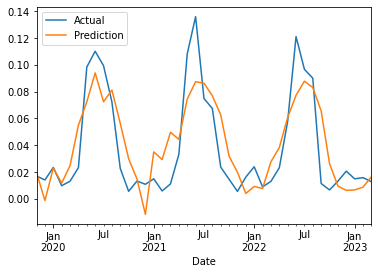

In [25]:
print('Intercepts: ', reg.coef_)
print(alachua_combined.head())
alachua_combined.plot()

## Precipitation  Percentile Prediction in Alachua

In [82]:
alachua_df['Target'] = alachua_df.shift(-1)['AVG_Precip_Percentile']
alachua_df = alachua_df.iloc[:-3,:].copy()
alachua_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.714286,2.714286,78.249658,27.608118,0.025237,0.029095
2006-02-01,0.428571,0.952381,81.318539,32.829384,0.029095,0.008301
2006-03-01,0.952381,0.476190,84.662147,35.377309,0.008301,0.016765
2006-04-01,0.857143,0.000000,90.444171,45.618184,0.016765,0.040942
2006-05-01,0.761905,0.000000,95.701762,55.105053,0.040942,0.080165
...,...,...,...,...,...,...
2022-11-01,0.952381,0.142857,86.245411,39.871050,0.006682,0.013194
2022-12-01,1.095238,1.238095,81.418748,31.882749,0.013194,0.020701
2023-01-01,0.809524,1.285714,79.538338,29.248816,0.020701,0.014978


In [83]:
error, r_square, alachua_combined = predict(predictors, alachua_df, reg)

Error:  0.01758760753779788
r^2:  0.6648131187003211


Intercepts:  [-0.03081729  0.02129047  0.00944872 -0.00286186  0.09805056]
              Actual  Prediction
Date                            
2019-11-01  0.017071    0.019470
2019-12-01  0.014121   -0.001227
2020-01-01  0.023515    0.023048
2020-02-01  0.009832    0.011792
2020-03-01  0.013203    0.024820


<AxesSubplot:xlabel='Date'>

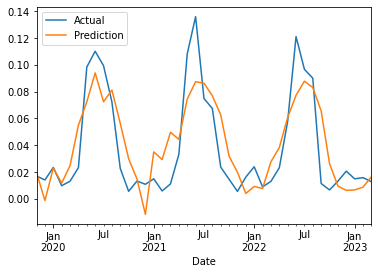

In [84]:
print('Intercepts: ', reg.coef_)
print(alachua_combined.head())
alachua_combined.plot()

# Predictions

In [55]:
#Getting this months data for each city
adelphi_april = adelphi_df.iloc[207:208][predictors]
ack_april = ack_df.iloc[207:208][predictors]
albany_april = albany_df.iloc[207:208][predictors]
alachua_april = alachua_df.iloc[207:208][predictors]

In [56]:
adelphi_april

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
Date,,,,,
2023-04-01,0.238095,1.333333,83.160816,31.140722,0.018859


In [57]:
print("Avg Frost Days for May in Adelphi: ", reg.predict(adelphi_april))

Avg Frost Days for May in Adelphi:  [0.87786056]


In [61]:
print("Avg Precipitation Percentile for May in Adelphi: ", reg.predict(adelphi_april))

Avg Precipitation Percentile for May in Adelphi:  [0.03866022]


In [66]:
print("Avg Frost Days for May in Akerman: ", reg.predict(ack_april))

Avg Frost Days for May in Akerman:  [0.61548694]


In [70]:
print("Avg Precipitation Percentile for May in Akerman: ", reg.predict(ack_april))

Avg Precipitation Percentile for May in Akerman:  [0.03368333]


In [76]:
print("Avg Frost Days for May in Albany: ", reg.predict(albany_april))

Avg Frost Days for May in Albany:  [-0.11946896]


In [85]:
print("Avg Precipitation Percentile for May in Albany: ", reg.predict(albany_april))

Avg Precipitation Percentile for May in Albany:  [-0.11946896]


In [77]:
print("Avg Frost Days for May in Alachua: ", reg.predict(alachua_april))

Avg Frost Days for May in Alachua:  [0.0480071]


In [86]:
print("Avg Precipitation Percentile for May in Alachua: ", reg.predict(alachua_april))

Avg Precipitation Percentile for May in Alachua:  [0.0480071]


In [88]:
adelphi_df.iloc[207:][predictors]

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
Date,,,,,
2023-04-01,0.238095,1.333333,83.160816,31.140722,0.018859
2023-05-01,0.333333,0.047619,89.866470,39.988250,0.041457
2023-06-01,0.285714,0.000000,96.664023,51.888881,0.041154
